# 常用的 DataFrame 操作
* merge / transform
* subset
* groupby

# [作業目標]
- 練習填入對應的欄位資料或公式, 完成題目的要求 

# [作業重點]
- 填入適當的輸入資料, 讓後面的程式顯示題目要求的結果 (Hint: 填入對應區間或欄位即可, In[4]~In[6], Out[4]~In[6])
- 填入z轉換的計算方式, 完成轉換後的數值 (Hint: 參照標準化公式, In[7])

In [1]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# 設定 data_path
dir_data = '../data/'

In [3]:
f_app = os.path.join(dir_data, 'application_train.csv')
print('Path of read in data: %s' % (f_app))
app_train = pd.read_csv(f_app)
app_train.head()

Path of read in data: ../data/application_train.csv


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## 作業
1. 請將 app_train 中的 CNT_CHILDREN 依照下列規則分為四組，並將其結果在原本的 dataframe 命名為 CNT_CHILDREN_GROUP
    * 0 個小孩
    * 有 1 - 2 個小孩
    * 有 3 - 5 個小孩
    * 有超過 5 個小孩

2. 請根據 CNT_CHILDREN_GROUP 以及 TARGET，列出各組的平均 AMT_INCOME_TOTAL，並繪製 baxplot
3. 請根據 CNT_CHILDREN_GROUP 以及 TARGET，對 AMT_INCOME_TOTAL 計算 [Z 轉換](https://en.wikipedia.org/wiki/Standard_score) 後的分數

In [9]:
#1
"""
Your code here
"""
# 以分位點來做filter

cut_rule = [-np.inf,0,2,5,np.inf]

app_train['CNT_CHILDREN_GROUP'] = pd.cut(app_train['CNT_CHILDREN'].values, cut_rule, include_lowest=True)
app_train['CNT_CHILDREN_GROUP'].value_counts()

(-inf, 0.0]    215371
(0.0, 2.0]      87868
(2.0, 5.0]       4230
(5.0, inf]         42
Name: CNT_CHILDREN_GROUP, dtype: int64

In [11]:
app_train['CNT_CHILDREN_GROUP'].head()

0    (-inf, 0.0]
1    (-inf, 0.0]
2    (-inf, 0.0]
3    (-inf, 0.0]
4    (-inf, 0.0]
Name: CNT_CHILDREN_GROUP, dtype: category
Categories (4, interval[float64]): [(-inf, 0.0] < (0.0, 2.0] < (2.0, 5.0] < (5.0, inf]]

In [12]:
#2-1
"""
Your code here
"""
grp = ['CNT_CHILDREN_GROUP','TARGET']

grouped_df = app_train.groupby(grp)['AMT_INCOME_TOTAL']
grouped_df.mean()

CNT_CHILDREN_GROUP  TARGET
(-inf, 0.0]         0         166747.010980
                    1         160804.210548
(0.0, 2.0]          0         174590.584401
                    1         176115.362720
(2.0, 5.0]          0         175053.742913
                    1         160677.385714
(5.0, inf]          0         139159.090909
                    1         180000.000000
Name: AMT_INCOME_TOTAL, dtype: float64

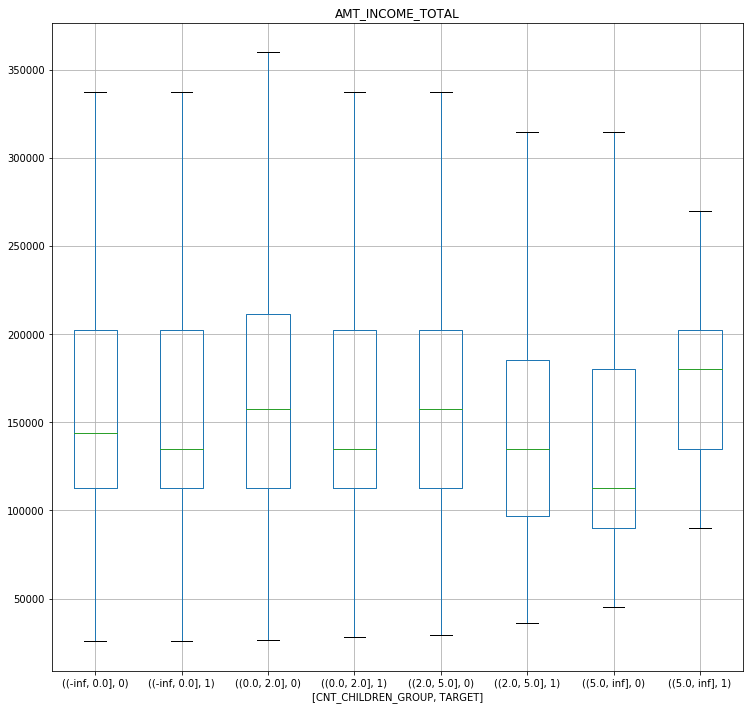

In [14]:
#2-2
"""
Your code here
"""
plt_column = 'AMT_INCOME_TOTAL'
plt_by = ['CNT_CHILDREN_GROUP', 'TARGET']

app_train.boxplot(column=plt_column, by = plt_by, showfliers = False, figsize=(12,12))
    # column引數表示要繪製成箱形圖的資料，可以是一列或多列
    # by引數表示分組依據
    # showfliersbool, optional (True)，Show the outliers beyond the caps.
plt.suptitle('')
plt.show()

In [ ]:
#3
"""
Your code here
"""
app_train['AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET'] = grouped_df.apply(lambda x: )

app_train[['AMT_INCOME_TOTAL','AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET']].head()

# df.boxplot()

DataFrame.boxplot(self, column=None, by=None, ax=None, fontsize=None, rot=0, grid=True, figsize=None, layout=None, return_type=None, backend=None, **kwargs)

    。column：str or list of str, optional
        Column name or list of names, or vector. Can be any valid input to pandas.DataFrame.groupby().

    。by：str or array-like, optional
        Column in the DataFrame to pandas.DataFrame.groupby(). One box-plot will be done per value of columns in by.


https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html

### 箱形圖簡介：
因為箱形圖是基於五數概括法的圖形彙總，在介紹箱形圖前，先簡單介紹一下五數概括法。

五數概括法使用下面五個數來彙總資料：

（1）最小值

（2）第一四分位數(Q1)

（3）中位數(Q2)

（4）第三四分位數(Q3)

（5）最大值

而箱形圖就是五數概括法的圖形表示。如下圖所示：

![箱型圖例](https://img-blog.csdnimg.cn/20181107181415901.png?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L3FxXzQxMDgwODUw,size_16,color_FFFFFF,t_70)

### 箱形圖的應用：
（1）可以作為一種檢測異常值的方法；

（2）用於多組資料的圖形彙總，便於對各組資料進行直觀比較分析。

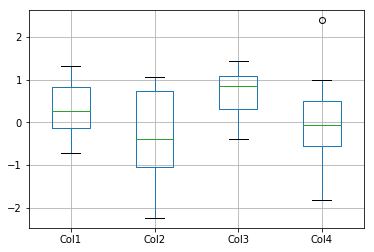

In [15]:
import numpy as np
import pandas as pd

np.random.seed(1234)
df = pd.DataFrame(np.random.randn(10, 4),
                  columns=['Col1', 'Col2', 'Col3', 'Col4'])
df.boxplot(column=['Col1', 'Col2', 'Col3', 'Col4'])

       Col1      Col2  X
0 -0.974236 -0.070345  A
1  0.307969 -0.208499  A
2  1.033801 -2.400454  A
3  2.030604 -1.142631  A
4  0.211883  0.704721  A
5 -0.785435  0.462060  B
6  0.704228  0.523508  B
7 -0.926254  2.007843  B
8  0.226963 -1.152659  B
9  0.631979  0.039513  B


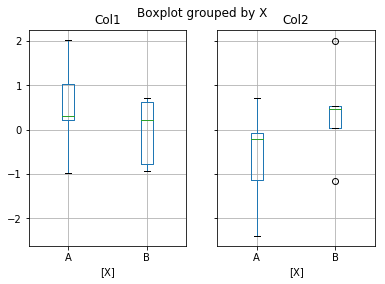

In [17]:
df = pd.DataFrame(np.random.randn(10, 2),
                  columns=['Col1', 'Col2'])
df['X'] = pd.Series(['A', 'A', 'A', 'A', 'A',
                     'B', 'B', 'B', 'B', 'B'])
print(df)
boxplot = df.boxplot(by='X')
    # 以 X 欄位來分組